In [ ]:
from langchain_community.document_loaders import PyPDFLoader, TextLoader

# 读取PDF文件
# file_path = (
#     "C:/Google/Documents/Python编程：从入门到实践（第3版）_([美]_埃里克_•_马瑟斯（Eric_Matthes）)_(Z-Library).pdf"
# )
file_path = (
    "C:/Google/Documents/Arxiv_EasyRAG_2410.10315.pdf"
)
loader = PyPDFLoader(file_path=file_path)
documents = loader.load()
print(f"len = {len(documents)}\n")
print(f"documents = {documents[0].page_content}\n\n")

In [ ]:
from langchain_text_splitters import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    chunk_size=512,
    chunk_overlap=0,
    separator='\n'
)
chunks = text_splitter.split_documents(documents)
texts = [doc.page_content for doc in chunks]
print(f"len texts = {len(texts)}\n") 
print(f"chunks = {chunks[0].page_content}\n") 

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings

embedding = HuggingFaceEmbeddings(
    model_name="D:\\Models\\all-mpnet-base-v2"
)

# text_vector = embedding.embed_documents(texts=texts)
# print(f"len = {len(text_vector)}\n")
# print(f"vector = {text_vector[:3]}")

In [ ]:
from langchain_milvus import Milvus

URI = "./milvus.db"

# vector_store = Milvus(
#     embedding_function=embedding,
#     connection_args={"uri": URI}
# )
vector_store_saved = Milvus.from_documents(
    documents=chunks,
    embedding=embedding, 
    collection_name="learn_python",
    connection_args={"uri": URI}
)

In [1]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import CharacterTextSplitter 


loader = PyPDFLoader(file_path="pdf\华为年报_2024_cn.pdf")
documents = loader.load()
text_splitter = CharacterTextSplitter(
            chunk_size=512,
            chunk_overlap=0,
            separator='\n'
        )
chunks = text_splitter.split_documents(documents=documents)

In [ ]:
print("documents 1 = ", documents[5])
print("====================================")
print("chunks 1 = ", chunks[1])
print("===================================")
# print("chunks 2 = ", chunks[1])

bge-m3 1024:
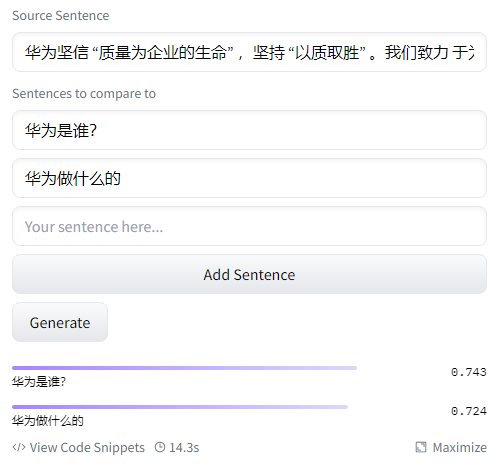

all-mpnet 768:
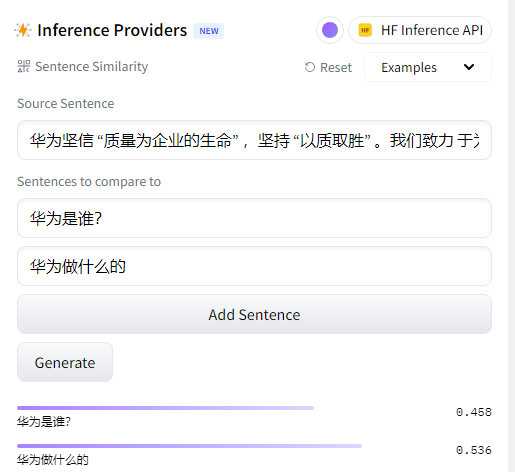


all-MiniLM 384:
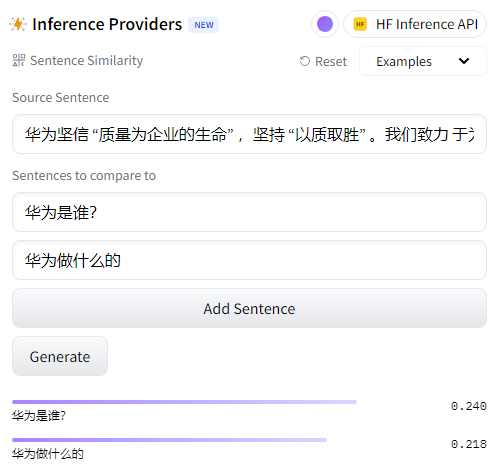

paraphrase-multilingual 384:
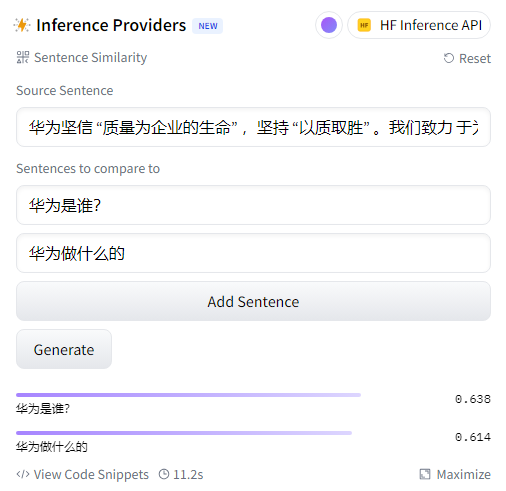